# **Gross National Income(per capita) vs Social Indicators**

### **A Regression Analysis**

This study aims to explore the relationship between an aggregate measure of the economy and social well-being. Gross Domestic Product (GDP), often used as an indicator of economic welfare, has significant limitations as it does not capture many factors contributing to a country's overall well-being.

### **Key Limitations of GDP as a Welfare Indicator**:
1. **Environmental Impact**: GDP does not account for environmental damage, such as pollution or loss of biodiversity, as these externalities are not monetized.
2. **Non-Market Transactions**: It excludes non-market activities like caregiving and domestic work.
3. **Inequality**: GDP overlooks how income or wealth is distributed among residents of a country.
4. **Long-Term Impact**: Actions depleting natural resources or impacting sustainability are ignored.
5. **Leisure Time**: GDP fails to reflect changes in leisure and quality of life.
6. **Health and Education**: It does not measure the quality of health and education.
7. **Sustainability**: GDP does not indicate whether a country's growth is sustainable in the long run.

### **Objective of the Study**
Using data provided by the World Bank, this analysis focuses on **Gross National Income (GNI) per capita** as the target variable. The study includes various social indices, such as the **Human Development Index (HDI)** and **Gender Development Index (GDI)**, to test the hypothesis that GDP or aggregate economic measures are insufficient indicators of well-being. 

If the hypothesis is rejected, we expect to observe a positive relationship between **GNI per capita** and social indicators. 

In [146]:
import pandas as pd
import numpy as np
!pip install openpyxl

In [147]:
df = pd.read_excel('hdr.xlsx')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Unnamed: 0                                                     195 non-null    int64  
 1   Carbon dioxide emissions per capita (production) (tonnes)      195 non-null    float64
 2   Expected Years of Schooling (years)                            195 non-null    float64
 3   Gender Development Index (value)                               195 non-null    float64
 4   Gross National Income Per Capita (2017 PPP$)                   195 non-null    float64
 5   Human Development Index (value)                                195 non-null    float64
 6   Labour force participation rate, female (% ages 15 and older)  195 non-null    float64
 7   Labour force participation rate, male (% ages 15 and older)   

## **Information of Dataset**

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_imputed)
data = pd.DataFrame(scaled, columns=df_imputed.columns)
data.head()

,Carbon dioxide emissions per capita (production) (tonnes),Expected Years of Schooling (years),Gender Development Index (value),Gross National Income Per Capita (2017 PPP$),Human Development Index (value),"Labour force participation rate, female (% ages 15 and older)","Labour force participation rate, male (% ages 15 and older)",Life Expectancy at Birth (years),Mean Years of Schooling (years),"Share of seats in parliament, female (% held by women)"
0,-0.735138,-0.943552,-4.651007,-0.882525,-1.701193,-1.807944,0.720535,-1.148794,-2.034207,0.160490
1,-0.479913,0.305538,0.407255,-0.258880,0.417798,0.426882,-0.000550,0.622655,0.341176,0.860470
2,-0.052971,0.636141,-0.960613,-0.451670,0.132673,-2.201000,-0.440431,0.660232,-0.637585,-1.504013
3,0.039937,-0.256915,0.342118,1.480955,1.033407,0.343338,0.165231,1.475627,0.807133,1.742961
4,-0.698807,-0.460363,-0.618646,-0.704138,-0.865261,1.699539,0.827994,-1.269396,-0.994548,0.689325


## __*Preliminary Descriptive Analysis*__

In [153]:
df_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
Carbon dioxide emissions per capita (production) (tonnes),195.0,4.373053,5.546605,0.038,0.792500,2.5390,5.8505,39.884
Expected Years of Schooling (years),195.0,13.561890,3.035598,5.635,11.673000,13.3810,15.6765,21.080
Gender Development Index (value),195.0,0.948418,0.070363,0.456,0.926000,0.9700,0.9910,1.064
Gross National Income Per Capita (2017 PPP$),195.0,21087.447118,22439.108954,690.661,4794.453000,12467.8550,32353.0670,146673.242
Human Development Index (value),195.0,0.724526,0.154716,0.380,0.605000,0.7400,0.8480,0.967
"Labour force participation rate, female (% ages 15 and older)",195.0,49.824304,14.692105,5.840,42.693571,52.1100,59.0800,82.940
"Labour force participation rate, male (% ages 15 and older)",195.0,69.915473,9.982856,29.630,65.380000,69.9300,75.8500,98.580
Life Expectancy at Birth (years),195.0,71.928241,7.897440,52.997,65.935500,72.3000,77.9525,86.895
Mean Years of Schooling (years),195.0,9.028552,3.210252,1.341,6.527500,9.4240,11.6350,14.256
"Share of seats in parliament, female (% held by women)",195.0,25.266372,12.173021,0.294,16.850500,25.1725,33.3330,54.717


In [154]:
data.rename(columns={'Carbon dioxide emissions per capita (production) (tonnes)':'cdepc',
       'Expected Years of Schooling (years)':'eys',
       'Expected Years of Schooling, female (years)':'eysf',
       'Expected Years of Schooling, male (years)':'eysm', 'GDI Group':'gdig',
       'Gender Development Index (value)':'gdi',
       'Gross National Income Per Capita (2017 PPP$)':'gnip',
       'Human Development Index (value)':'hdi', 'Inequality in life expectancy':'ile',
       'Labour force participation rate, female (% ages 15 and older)':'lfprf',
       'Labour force participation rate, male (% ages 15 and older)':'lfprm',
       'Life Expectancy at Birth (years)':'leb',
       'Maternal Mortality Ratio (deaths per 100,000 live births)':'mmr',
       'Mean Years of Schooling (years)':'mys',
       'Share of seats in parliament, female (% held by women)':'sspf',
       'Share of seats in parliament, male (% held by men)':'sspm'},inplace=True)
columns = data.columns
data.tail()

,cdepc,eys,gdi,gnip,hdi,lfprf,lfprm,leb,mys,sspf
190,-0.331513,-0.019780,0.763471,-0.665876,-0.165411,-0.314875,0.065734,-0.104510,0.187210,-0.256171
191,-0.136660,-0.168072,0.834714,-0.459016,0.009552,1.277140,0.795857,0.336639,-0.179123,0.411359
192,-0.727004,-1.858406,-7.016278,-0.892777,-1.947437,-3.001443,-0.524792,-1.042030,-1.952384,-2.056733
193,-0.710013,-0.840176,-0.262430,-0.801112,-1.007823,0.295863,-0.357075,-1.285392,-0.544518,-0.840600
194,-0.695553,-0.837534,-0.176939,-0.849297,-1.130945,0.695061,0.168172,-1.591593,-0.068879,0.688502


# __Data Visualization__

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.express as px

### __*correlation matrix heatmap*__

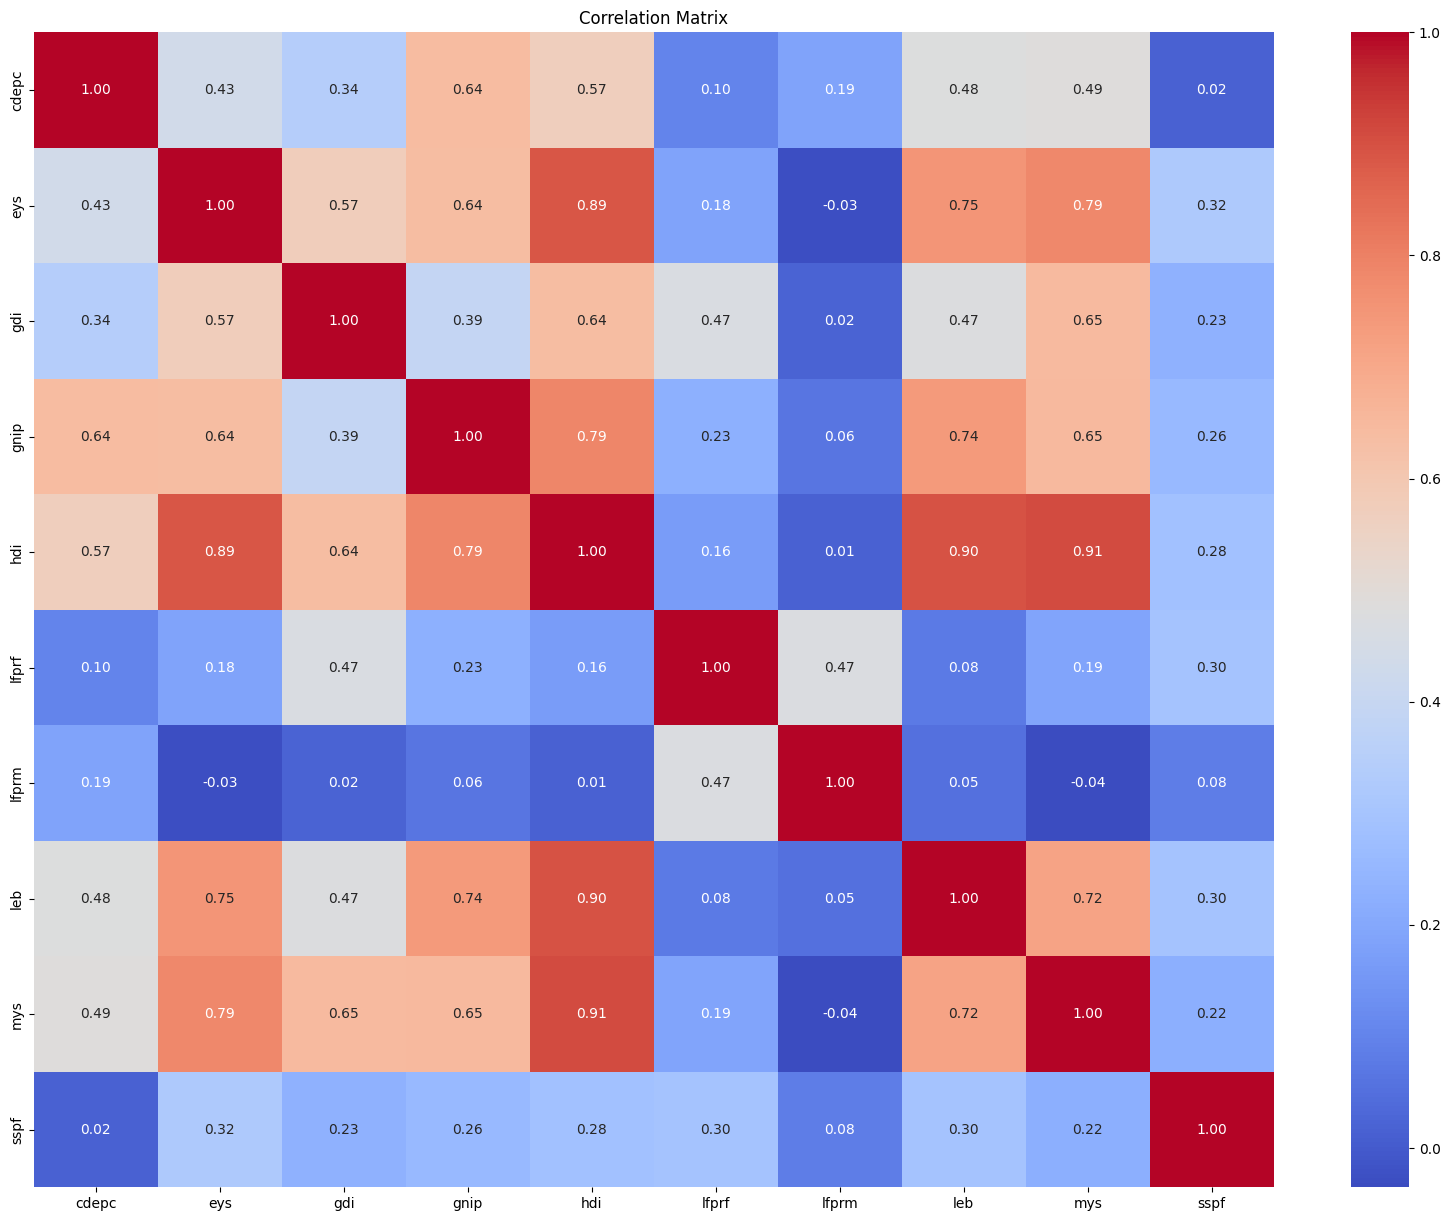

In [156]:
plt.figure(figsize=(20, 15))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [157]:
### __*Scatter matrix heatmap*__

<Figure size 2000x2000 with 0 Axes>

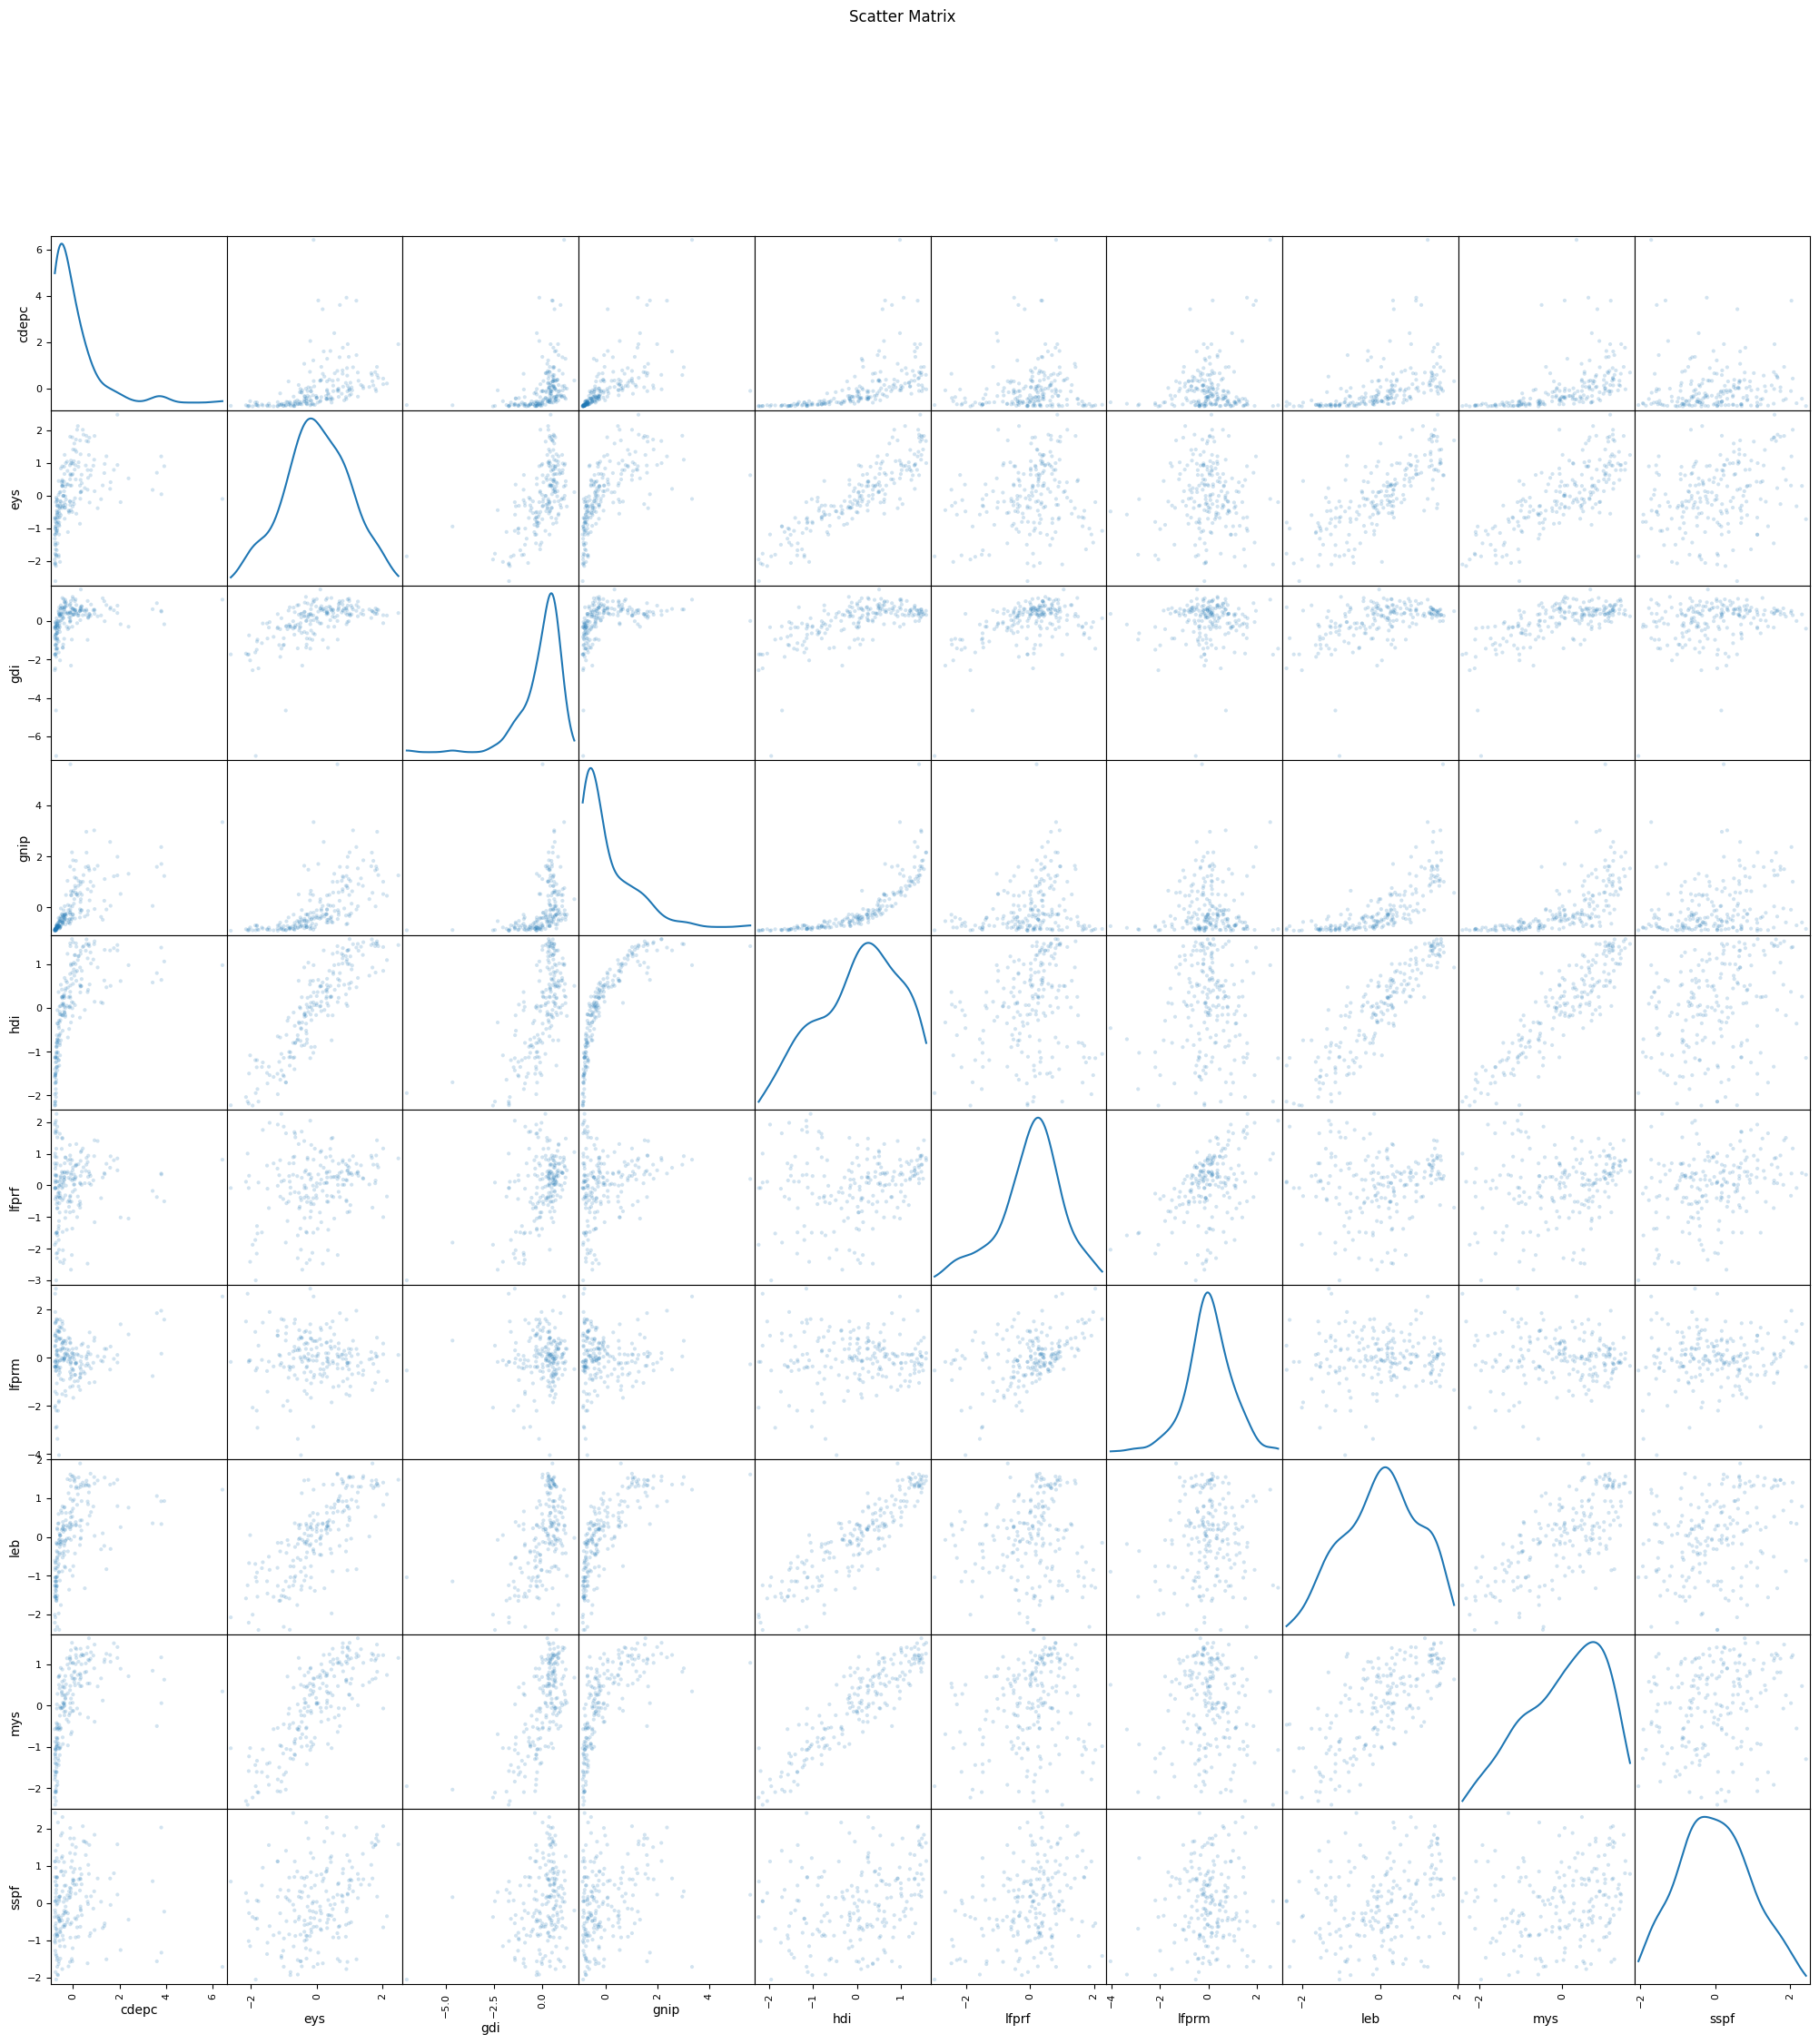

In [158]:
# Plot scatter matrix
plt.figure(figsize=(20, 20))
scatter_matrix(data, alpha=0.2, figsize=(25, 25), diagonal='kde')
plt.suptitle('Scatter Matrix')
plt.savefig('scatter_matrix.png')
plt.show()

### __*Residual Plots*__

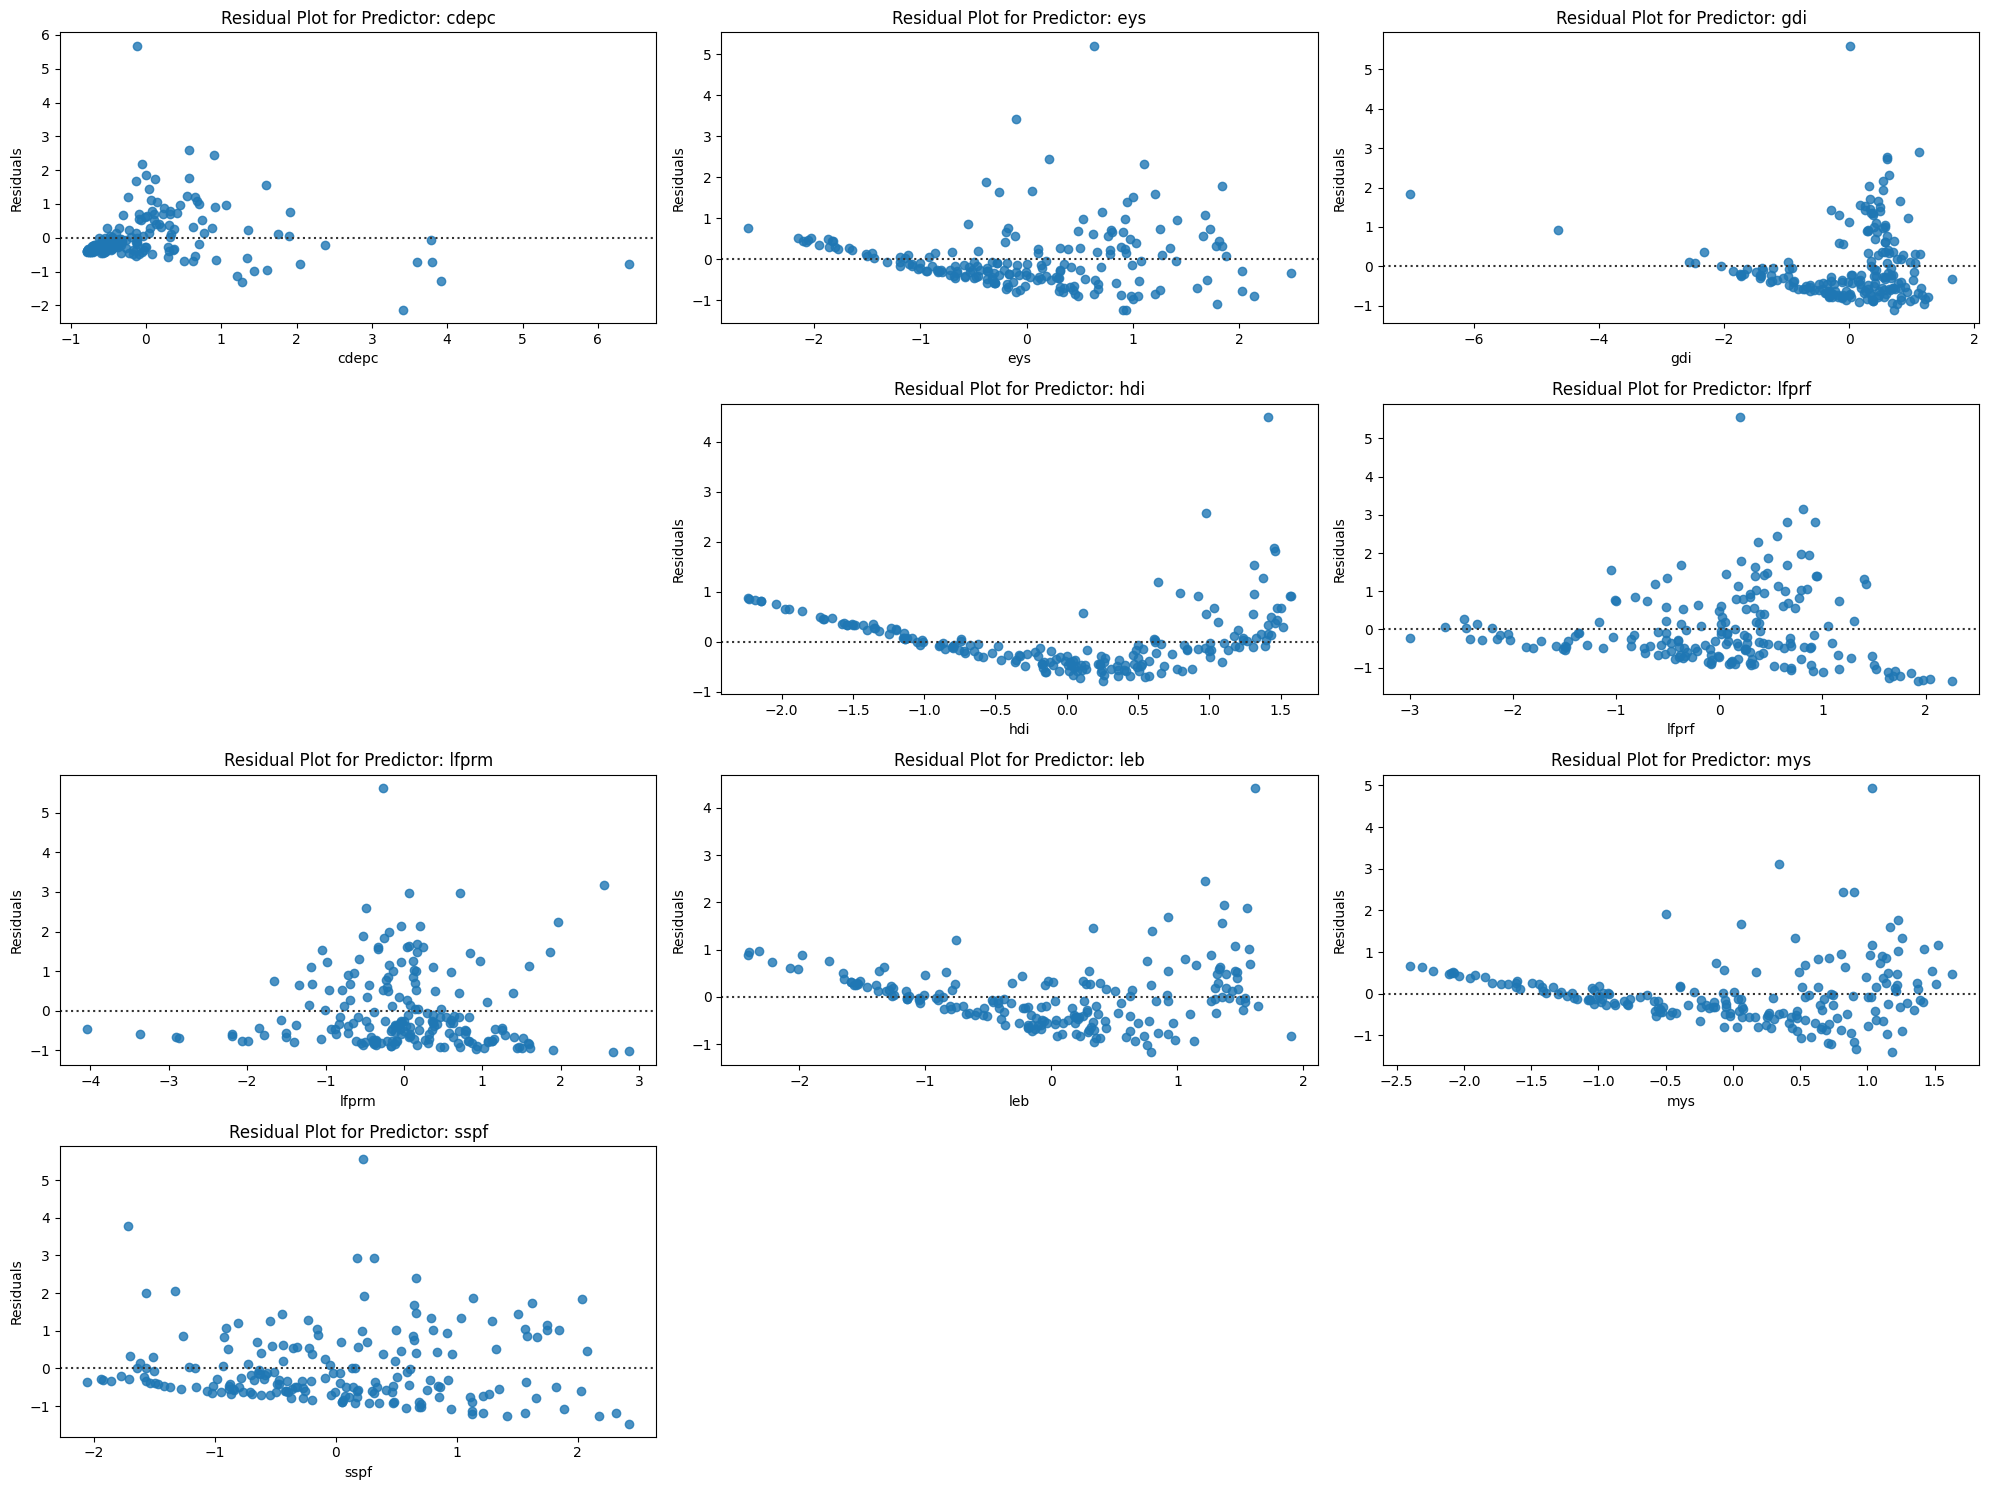

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
n_cols = 3 
n_rows = (len(data.columns) - 1) // n_cols + 1  #
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()
for i, b in enumerate(data.columns):
    if b != 'gnip':
        sns.residplot(x=b, y="gnip", data=data, ax=axes[i])
        axes[i].set_title(f"Residual Plot for Predictor: {b}")
        axes[i].set_xlabel(b)
        axes[i].set_ylabel("Residuals")
    else:
        axes[i].axis('off')
for j in range(i+1, len(axes)):  
    axes[j].axis('off')
plt.tight_layout()
plt.savefig('residual_plot.png')
plt.show()

> Residual plots indicate heteroscedasticity

## __*Visualization to check Linearity*__

In [160]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
rig_model = ols("gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys +sspf", data = data).fit()
rig_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gnip   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     77.21
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           7.12e-58
Time:                        19:00:00   Log-Likelihood:                -124.65
No. Observations:                 195   AIC:                             269.3
Df Residuals:                     185   BIC:                             302.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.939e-18      0.034  -2.06e-16      1.000      -0.067       0.067
cdepc          0.2468      0.045      5.478      0.000       0.158       0.336
eys           -0.4044      0.083     -4.898      0.000      -0.567      -0.242
gdi           -0.3644      0.054     -6.773      0.000      -0.471      -0.258
hdi            1.7865      0.220      8.125      0.000       1.353       2.220
lfprf          0.3351      0.049      6.887      0.000       0.239       0.431
lfprm         -0.1822      0.042     -4.339      0.000      -0.265      -0.099
leb           -0.1876      0.102     -1.847      0.066      -0.388       0.013
mys           -0.4849      0.102     -4.734      0.000      -0.687      -0.283
sspf           0.0381      0.038      1.004      0.317      -0.037       0.113
==============================================================================
Omnibus:                      203.439   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8111.555
Skew:                           3.873   Prob(JB):                         0.00
Kurtosis:                      33.632   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __*Partial Regression Plot*__

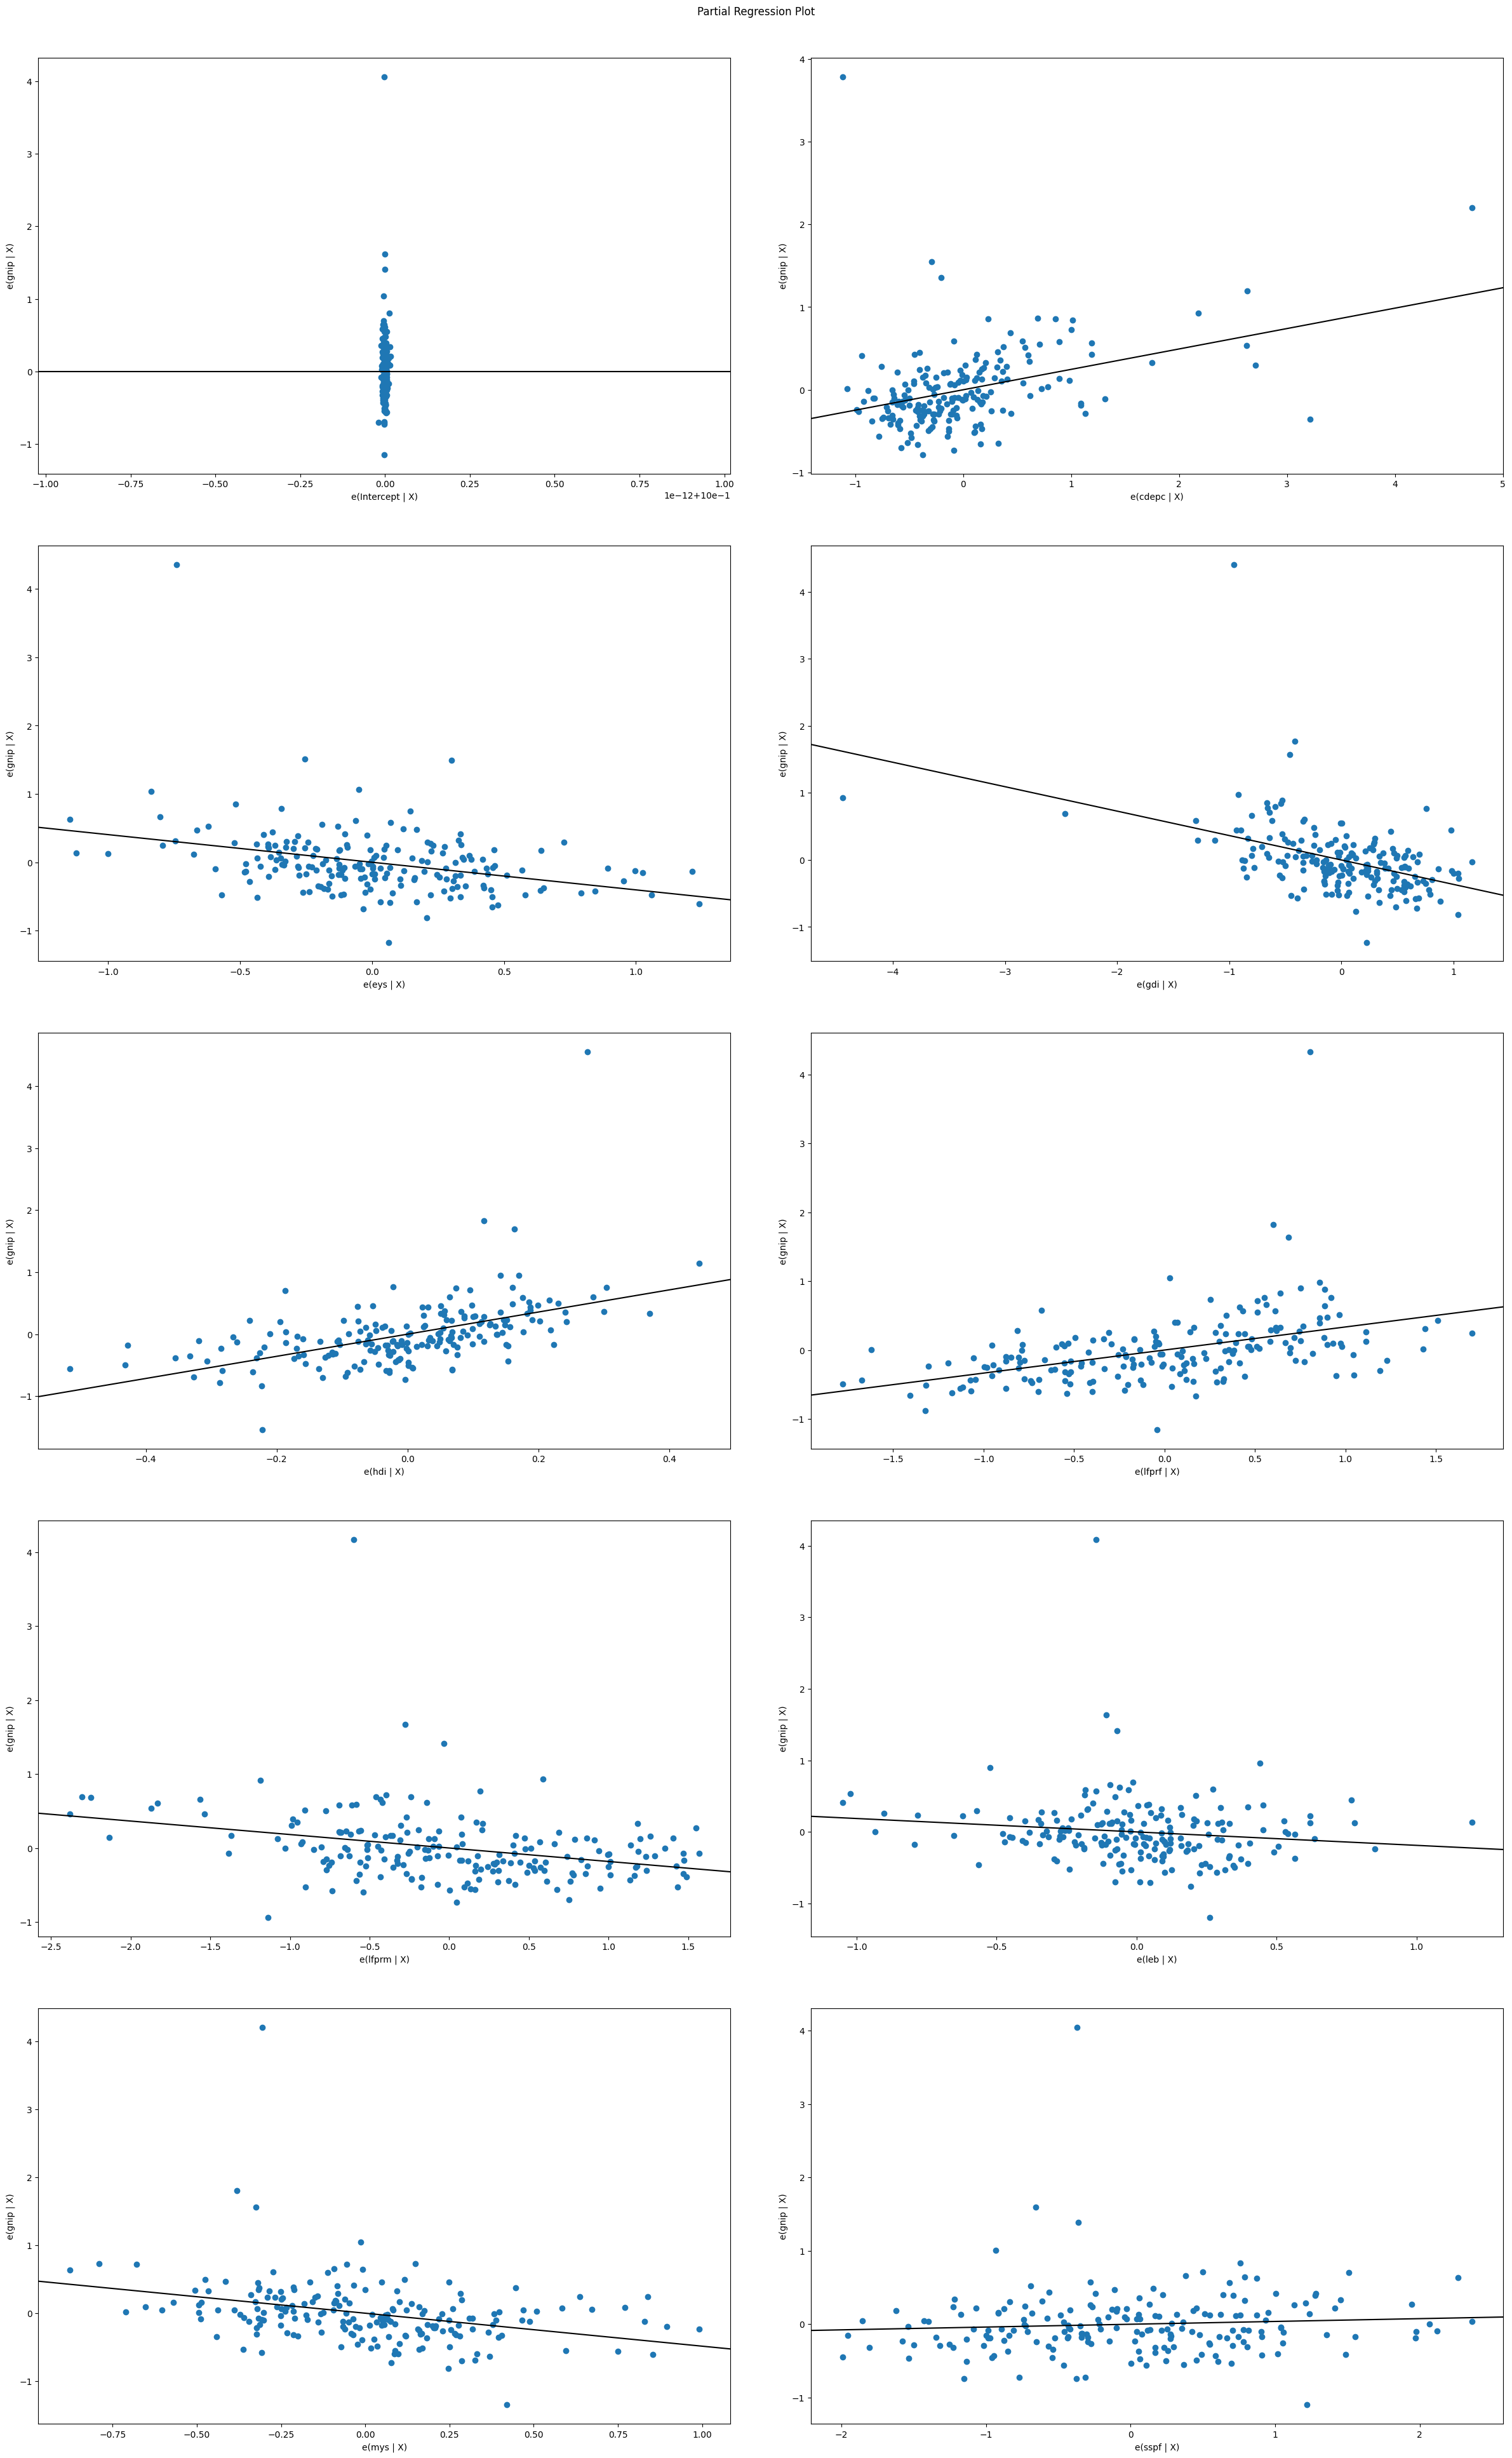

In [161]:
fig = sm.graphics.plot_partregress_grid(rig_model)
fig.set_size_inches(25, 40)
fig.tight_layout(pad=5.0)
plt.savefig('par_reg.png')

> Partial Regression plot Indicates Linearity between features and target but to ensure linearity we also check CCPR plot

### __*CCPR PLOT*__

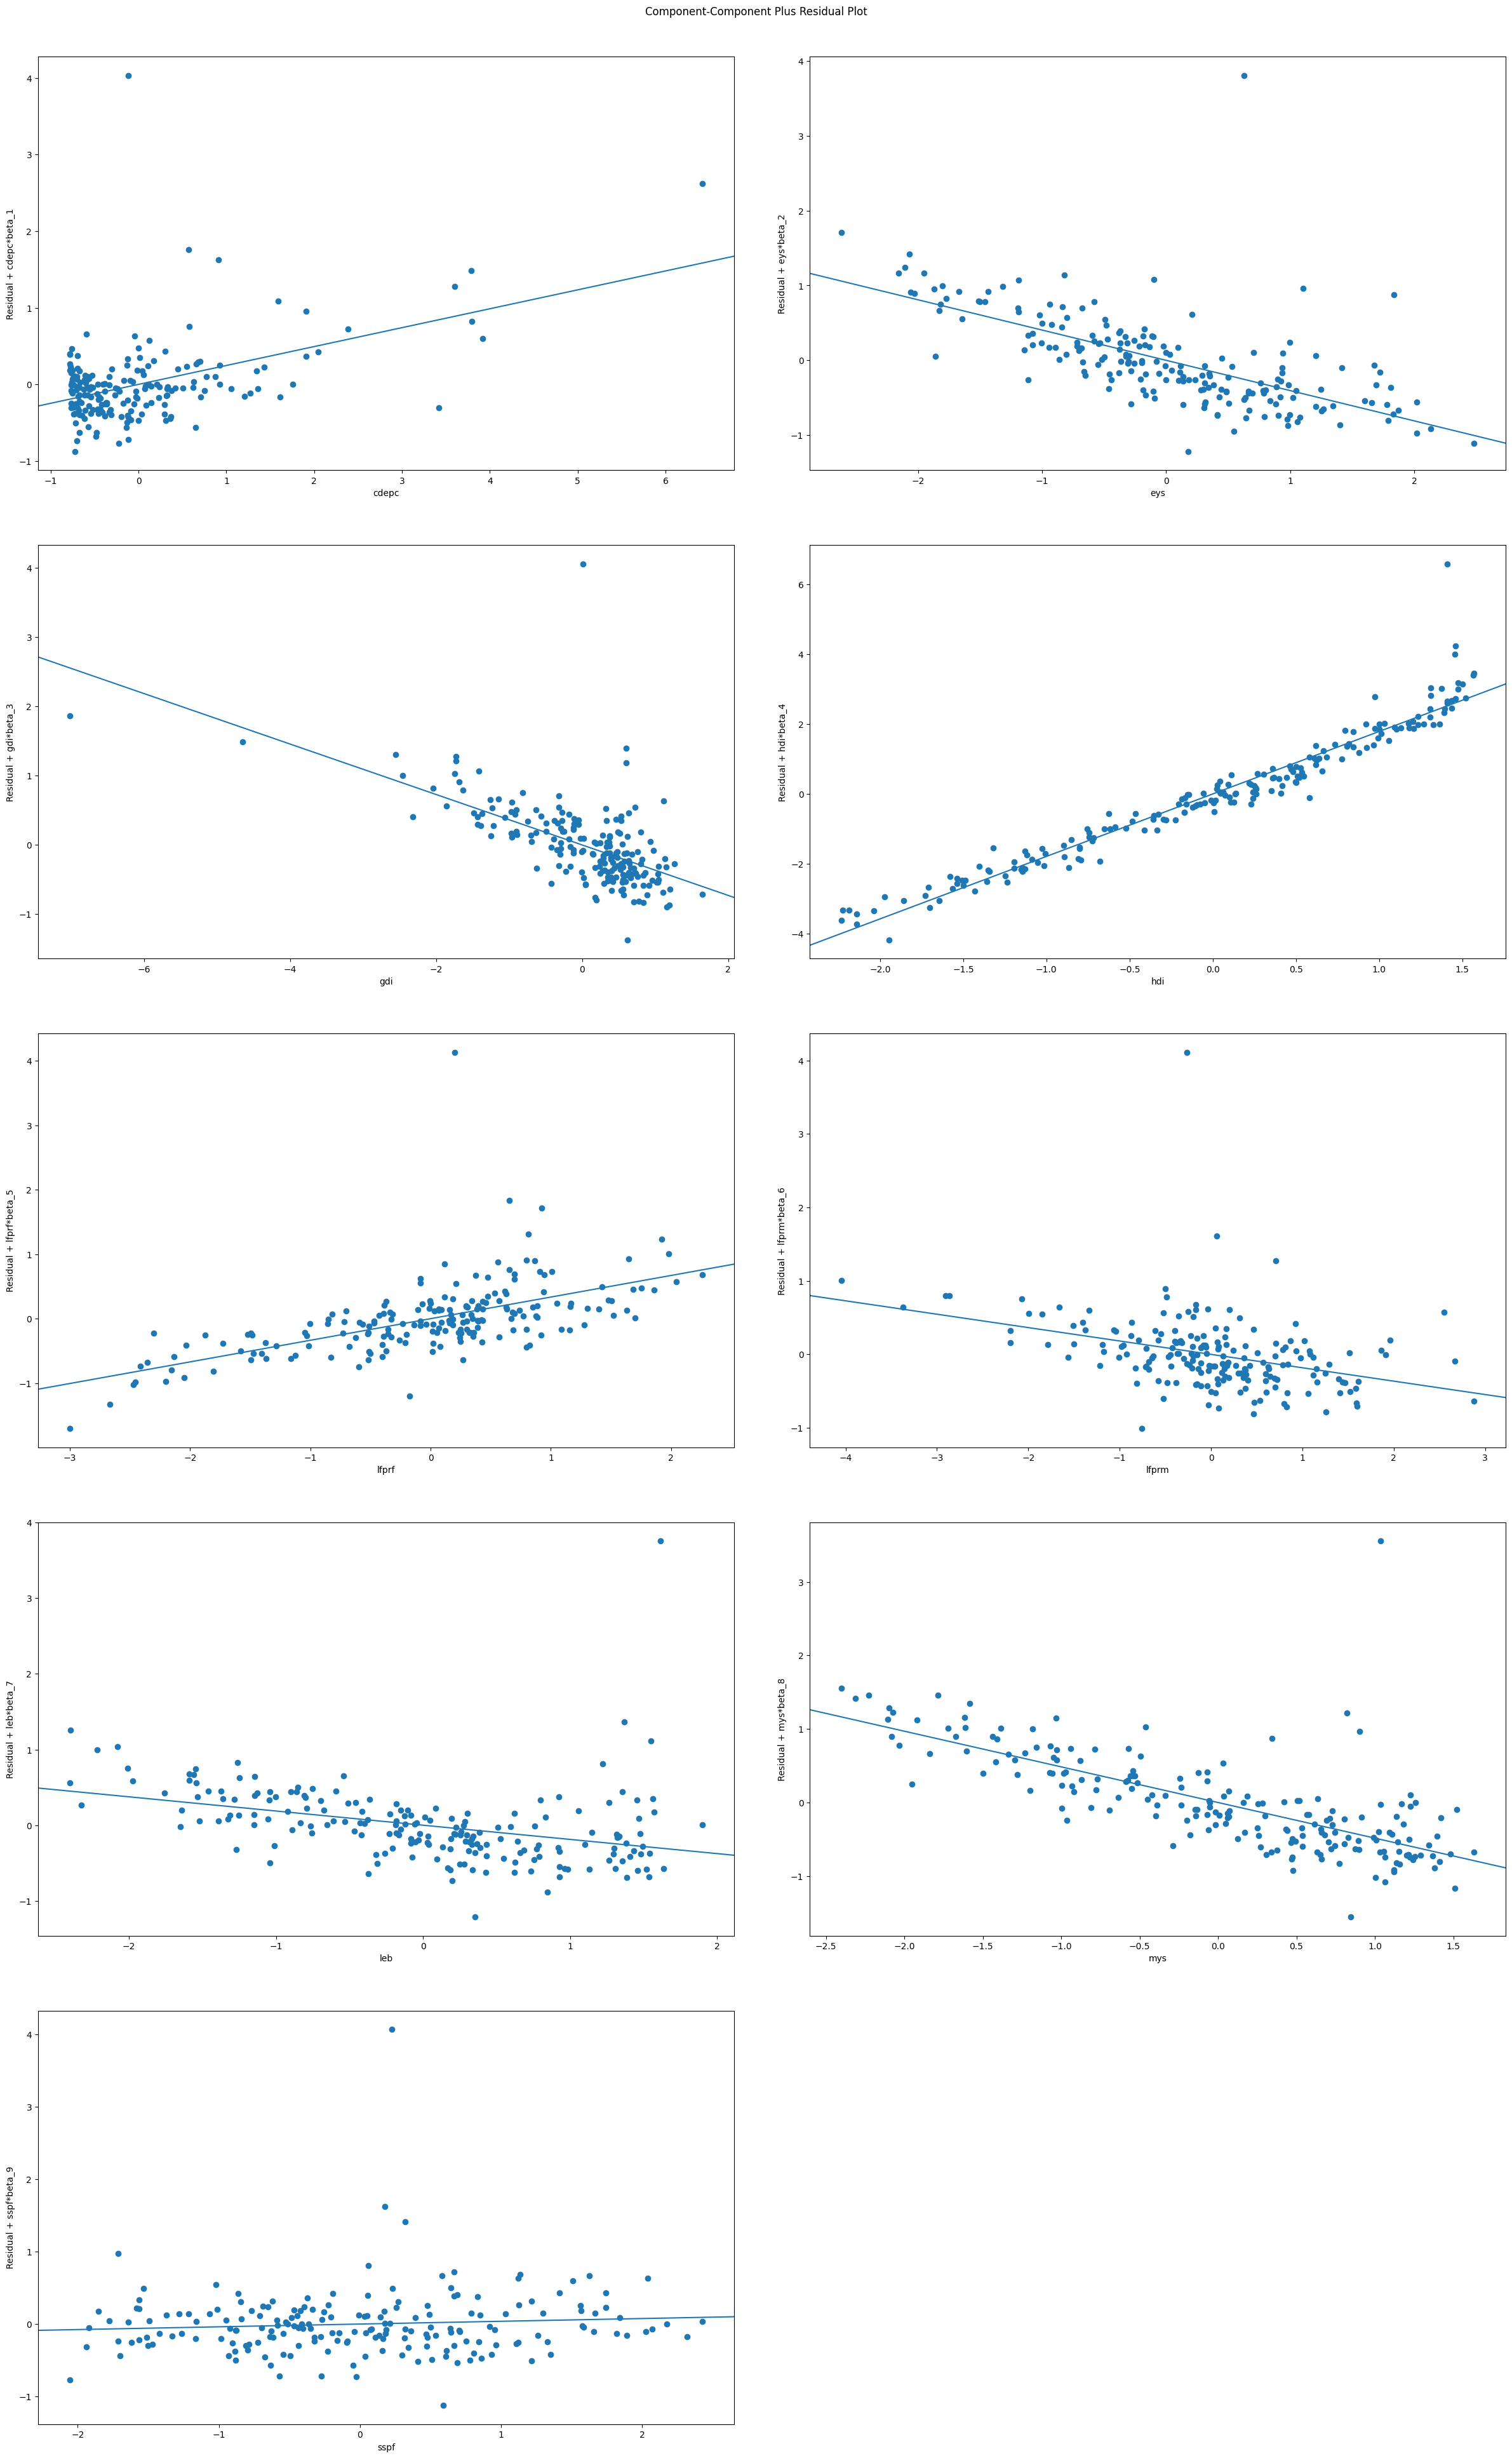

In [162]:
fig = sm.graphics.plot_ccpr_grid(rig_model)
fig.set_size_inches(25, 40)
fig.tight_layout(pad=5.0)
plt.savefig('ccpr.png')

> Linearity is verified

## __*Data Visualization for Normality*__
### __*QQ-Plot*__

In [163]:
predictions = rig_model.predict()
residuals = data['gnip']-predictions
residuals
student_resid = rig_model.outlier_test().student_resid
student_resid

0     -0.479691
1     -1.088502
2     -0.524319
3      0.357092
4     -1.229004
         ...   
190    0.387141
191   -1.136248
192   -1.832292
193    0.218033
194    0.825538
Name: student_resid, Length: 195, dtype: float64

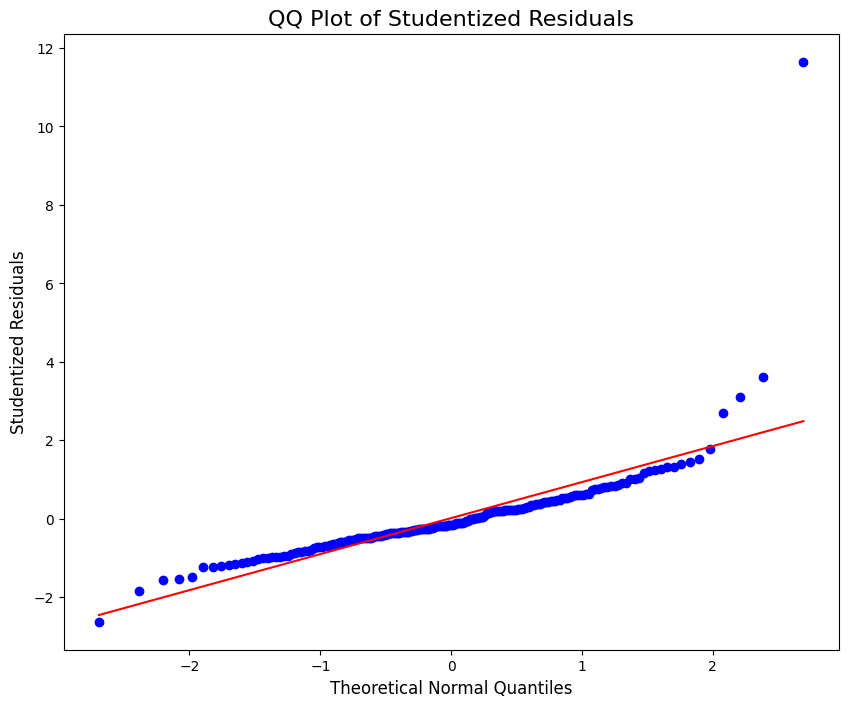

In [164]:
import scipy.stats as stats
plt.figure(figsize=(10, 8))  
stats.probplot(student_resid, dist="norm", plot=plt)
plt.title("QQ Plot of Studentized Residuals", fontsize=16)  
plt.xlabel("Theoretical Normal Quantiles", fontsize=12)  
plt.ylabel("Studentized Residuals", fontsize=12)
plt.savefig('qq.png')

> The Q-Q plot  suggests that our response variable is heavily skewed or contains extreme outliers. This is why the data points deviate significantly from the 45-degree line, especially for larger values.
> This implies data might not be normal.
> Data contains extreme Outliers.
> Data is affected by very high numeric values.


### **Checking for outliers**

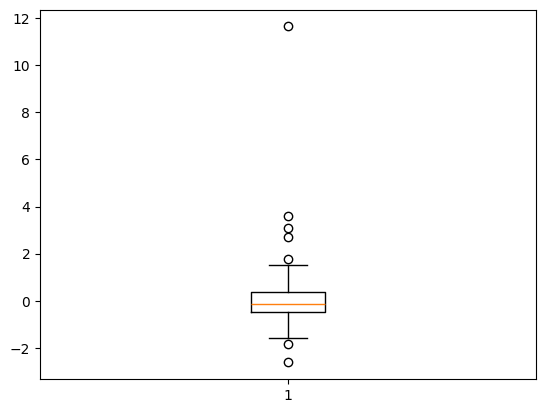

In [165]:
bp = plt.boxplot(student_resid, notch=None, vert=None, patch_artist=None, widths=None) 
plt.savefig('bx_plt.png')
plt.show()

> box plot indicated extreme outliers

## __***Formal Tests***__
### __*Tests for Normality*__

### *Kolmogorov-Smirnov Test*

In [166]:
from scipy.stats import kstest
residuals = rig_model.resid
kstest(data['gnip'], 'norm')

KstestResult(statistic=0.19024166732737074, pvalue=1.180897538004848e-06, statistic_location=-0.2546365264764, statistic_sign=1)

### **Results**
Since the **p-value** $ < .05 $, we reject the null hypothesis of the Kolmogorov-Smirnov test.

This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

### *Shapiro-Wilk Test*

In [167]:
from scipy.stats import shapiro
shapiro(data['gnip'])

ShapiroResult(statistic=0.8023329377174377, pvalue=5.569021823147212e-15)

### **Results**

From the output we can see that the test statistic is $0.642$ and the corresponding **p-value** is $4.9773764515742874e-20$ (extremely close to zero).
This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

### **box-cox Transformation**

In [168]:
#since data after standard scaler has negative values we cant use box-cox transformation, hence we will try yeo-jhonson transformation
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(data[['gnip']])

In [169]:
data['transformed_gnip'] = transformed_data
data1 = data.drop(['gnip'],axis=1)
data1.head()

,cdepc,eys,gdi,hdi,lfprf,lfprm,leb,mys,sspf,transformed_gnip
0,-0.735138,-0.943552,-4.651007,-1.701193,-1.807944,0.720535,-1.148794,-2.034207,0.160490,-1.337369
1,-0.479913,0.305538,0.407255,0.417798,0.426882,-0.000550,0.622655,0.341176,0.860470,0.078740
2,-0.052971,0.636141,-0.960613,0.132673,-2.201000,-0.440431,0.660232,-0.637585,-1.504013,-0.281720
3,0.039937,-0.256915,0.342118,1.033407,0.343338,0.165231,1.475627,0.807133,1.742961,1.460572
4,-0.698807,-0.460363,-0.618646,-0.865261,1.699539,0.827994,-1.269396,-0.994548,0.689325,-0.857175


In [170]:
rig_model1 = ols("transformed_gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys +sspf", data = data1).fit()
residuals1 = rig_model1.resid
rig_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       transformed_gnip   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     451.0
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          8.57e-121
Time:                        19:00:05   Log-Likelihood:                 28.757
No. Observations:                 195   AIC:                            -37.51
Df Residuals:                     185   BIC:                            -4.783
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-17      0.015  -3.39e-15      1.000      -0.030       0.030
cdepc          0.1415      0.021      6.896      0.000       0.101       0.182
eys           -0.3690      0.038     -9.815      0.000      -0.443      -0.295
gdi           -0.1853      0.024     -7.566      0.000      -0.234      -0.137
hdi            2.0484      0.100     20.458      0.000       1.851       2.246
lfprf          0.1767      0.022      7.975      0.000       0.133       0.220
lfprm         -0.1095      0.019     -5.726      0.000      -0.147      -0.072
leb           -0.3630      0.046     -7.847      0.000      -0.454      -0.272
mys           -0.5023      0.047    -10.771      0.000      -0.594      -0.410
sspf           0.0280      0.017      1.618      0.107      -0.006       0.062
==============================================================================
Omnibus:                       21.826   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.081
Skew:                           0.709   Prob(JB):                     4.84e-07
Kurtosis:                       4.253   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
kstest(data1['transformed_gnip'], 'norm')

KstestResult(statistic=0.10893983917623068, pvalue=0.018040079563277217, statistic_location=-0.8460857008452703, statistic_sign=1)

In [172]:
shapiro(data1['transformed_gnip'])

ShapiroResult(statistic=0.9341975450515747, pvalue=1.0071408240719393e-07)

After trying multiple transformations yet there is seen non-normality but qq plot indicates normality and hence we assume normality and since we are having sample size > 30 we might assume normality using weak law of large numbers

In [173]:
#we use bootstrapping for standard error estimation

In [174]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Assuming your data is already loaded in a DataFrame called 'data'
# 'gnip' is the response variable, and the remaining columns are predictors
y = data['gnip']  # Response variable
X = data.drop(['gnip','transformed_gnip'], axis=1)  # Predictor variables

# Add a constant column for the intercept term
X = pd.concat([pd.Series(1, index=X.index, name="Intercept"), X], axis=1)

# Number of bootstrap samples
n_bootstraps = 1000
coefficients = []

# Bootstrapping
for i in range(n_bootstraps):
    # Resample the data
    sample = resample(data, replace=True)
    
    # Split resampled data into predictors and response
    X_sample = pd.concat([pd.Series(1, index=sample.index, name="Intercept"), sample.drop(['gnip','transformed_gnip'], axis=1)], axis=1)
    y_sample = sample['gnip']
    
    # Fit the regression model
    model = LinearRegression()
    model.fit(X_sample, y_sample)
    
    # Save the coefficients
    coefficients.append(model.coef_)  # Save all coefficients

# Convert coefficients to a numpy array
coefficients = np.array(coefficients)

# Ensure coefficients array has the correct dimensions
if coefficients.shape[1] != X.shape[1]:
    raise ValueError(f"Mismatch in dimensions: coefficients {coefficients.shape[1]} and predictors {X.shape[1]}")

# Analyze the bootstrapped results
mean_coefficients = np.mean(coefficients, axis=0)
std_errors = np.std(coefficients, axis=0)  # Standard error for each coefficient
conf_intervals = np.percentile(coefficients, [2.5, 97.5], axis=0)  # 95% confidence interval

# Create a summary table
summary_table = pd.DataFrame({
    'Predictor': X.columns,
    'Mean Coefficient': mean_coefficients,
    'Standard Error': std_errors,
    '2.5th Percentile': conf_intervals[0],
    '97.5th Percentile': conf_intervals[1]
})

# Display the table
summary_table

,Predictor,Mean Coefficient,Standard Error,2.5th Percentile,97.5th Percentile
0,Intercept,0.000000,0.000000,0.000000,0.000000
1,cdepc,0.235539,0.078606,0.060388,0.373395
2,eys,-0.402708,0.106341,-0.625100,-0.223117
3,gdi,-0.382599,0.079574,-0.557905,-0.256983
4,hdi,1.803794,0.296553,1.301158,2.422500
5,lfprf,0.338294,0.051077,0.245892,0.444571
6,lfprm,-0.183041,0.035245,-0.254889,-0.116495
7,leb,-0.195246,0.078755,-0.364017,-0.049529
8,mys,-0.483977,0.099739,-0.691713,-0.305487
9,sspf,0.036895,0.029473,-0.024051,0.091237


### __*Tests for heteroscedasticity*__ 
**Breusch-Pagan and White tests**

In [175]:
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(rig_model.resid, rig_model.model.exog)

# Labels for the test results
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

# Create a DataFrame for the table
bp_table = pd.DataFrame({
    'Metric': labels,
    'Value': bp_test
})
bp_table

,Metric,Value
0,LM Statistic,11.187098
1,LM-Test p-value,0.263102
2,F-Statistic,1.251038
3,F-Test p-value,0.266584


**Results**\
since the *p-value* $>0.05$
, we may accept the null hypothesis of the bresush-Pagan Test, hence there is no heteroscedasticity.

### __*Model Selection*__ 

We calculate the best n-1 subset model and compare their AIC and BIC scores, if it is lower than full model we choose the subset and continue this exercise if variables equal to one

In [176]:
from itertools import combinations
columns = list(data.drop(["gnip"],axis=1).columns)
combs = combinations(columns, 8)
data.head()

,cdepc,eys,gdi,gnip,hdi,lfprf,lfprm,leb,mys,sspf,transformed_gnip
0,-0.735138,-0.943552,-4.651007,-0.882525,-1.701193,-1.807944,0.720535,-1.148794,-2.034207,0.160490,-1.337369
1,-0.479913,0.305538,0.407255,-0.258880,0.417798,0.426882,-0.000550,0.622655,0.341176,0.860470,0.078740
2,-0.052971,0.636141,-0.960613,-0.451670,0.132673,-2.201000,-0.440431,0.660232,-0.637585,-1.504013,-0.281720
3,0.039937,-0.256915,0.342118,1.480955,1.033407,0.343338,0.165231,1.475627,0.807133,1.742961,1.460572
4,-0.698807,-0.460363,-0.618646,-0.704138,-0.865261,1.699539,0.827994,-1.269396,-0.994548,0.689325,-0.857175


Mallows Cp for full model

In [177]:
from sklearn.metrics import mean_squared_error
p_subset = len(data.columns)
n = len(data["gnip"])
sigma_squared = mean_squared_error(data["gnip"], rig_model.predict(data))
rss_full = np.sum((data["gnip"] - rig_model.predict(data)) ** 2)
mallows_cp = (rss_full/ sigma_squared) + 2 * p_subset - n
mallows_cp

22.0

In [178]:
from sklearn.linear_model import LinearRegression
import numpy as np
from itertools import combinations

# Define y and X
y = data["gnip"]
X = data.drop(["gnip", "transformed_gnip"], axis=1)

# Estimate sigma_squared
residuals = y - LinearRegression().fit(X, y).predict(X)
sigma_squared = np.var(residuals, ddof=1)

# Number of observations
n = X.shape[0]

# Initialize variables
best_model = []
cp = float('inf')

# Iterate through combinations
for comb in combinations(X.columns, 9):  # Adjust the subset size as needed
    col = list(comb)
    subset_model = LinearRegression().fit(X[col], y)
    rss_subset = np.sum((y - subset_model.predict(X[col])) ** 2)
    p_subset = len(col)
    mallows_cp = (rss_subset / sigma_squared) + 2 * p_subset - n
    
    if mallows_cp < cp:
        cp = mallows_cp
        best_model = col

print(cp)
print(best_model)

16.99999999999997
['cdepc', 'eys', 'gdi', 'hdi', 'lfprf', 'lfprm', 'leb', 'mys', 'sspf']


In [179]:
best_model = []
cp = float('inf')

# Iterate through combinations
for comb in combinations(X.columns, 8):  # Adjust the subset size as needed
    col = list(comb)
    subset_model = LinearRegression().fit(X[col], y)
    rss_subset = np.sum((y - subset_model.predict(X[col])) ** 2)
    p_subset = len(col)
    mallows_cp = (rss_subset / sigma_squared) + 2 * p_subset - n
    
    if mallows_cp < cp:
        cp = mallows_cp
        best_model = col

print(cp)
print(best_model)

16.05643215600233
['cdepc', 'eys', 'gdi', 'hdi', 'lfprf', 'lfprm', 'leb', 'mys']


In [180]:
best_model = []
cp = float('inf')

# Iterate through combinations
for comb in combinations(X.columns, 7):  # Adjust the subset size as needed
    col = list(comb)
    subset_model = LinearRegression().fit(X[col], y)
    rss_subset = np.sum((y - subset_model.predict(X[col])) ** 2)
    p_subset = len(col)
    mallows_cp = (rss_subset / sigma_squared) + 2 * p_subset - n
    
    if mallows_cp < cp:
        cp = mallows_cp
        best_model = col

print(cp)
print(best_model)

17.306542680831484
['cdepc', 'eys', 'gdi', 'hdi', 'lfprf', 'lfprm', 'mys']


In [181]:
subset_model = ols("gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys", data = data).fit()
print(subset_model.summary())
#['cdepc', 'eys', 'gdi', 'hdi', 'lfprf', 'lfprm', 'leb', 'mys']
#['cdepc', 'eys', 'gdi', 'hdi', 'lfprf', 'lfprm', 'leb', 'mys']

                            OLS Regression Results                            
Dep. Variable:                   gnip   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     86.73
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.22e-58
Time:                        19:00:08   Log-Likelihood:                -125.18
No. Observations:                 195   AIC:                             268.4
Df Residuals:                     186   BIC:                             297.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.939e-18      0.034  -2.06e-16      1.0

In [182]:
print(rig_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gnip   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     77.21
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           7.12e-58
Time:                        19:00:08   Log-Likelihood:                -124.65
No. Observations:                 195   AIC:                             269.3
Df Residuals:                     185   BIC:                             302.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.939e-18      0.034  -2.06e-16      1.0

In [183]:
#anova testing for restricted and unrestricted model
anova_table = sm.stats.anova_lm(subset_model,rig_model)
anova_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,186.0,41.223803,0.0,NaN,NaN,NaN
1,185.0,41.000534,1.0,0.223269,1.007422,0.316832


In [184]:
final_dataset = data[['gnip','cdepc', 'eys', 'gdi', 'hdi', 'lfprf', 'lfprm', 'leb', 'mys']]
final_dataset_model = ols("gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys", data = final_dataset ).fit()
final_dataset_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gnip   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     86.73
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.22e-58
Time:                        19:00:08   Log-Likelihood:                -125.18
No. Observations:                 195   AIC:                             268.4
Df Residuals:                     186   BIC:                             297.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.939e-18      0.034  -2.06e-16      1.000      -0.067       0.067
cdepc          0.2399      0.045      5.388      0.000       0.152       0.328
eys           -0.3950      0.082     -4.815      0.000      -0.557      -0.233
gdi           -0.3668      0.054     -6.826      0.000      -0.473      -0.261
hdi            1.7888      0.220      8.135      0.000       1.355       2.223
lfprf          0.3471      0.047      7.360      0.000       0.254       0.440
lfprm         -0.1837      0.042     -4.379      0.000      -0.267      -0.101
leb           -0.1781      0.101     -1.760      0.080      -0.378       0.021
mys           -0.4901      0.102     -4.792      0.000      -0.692      -0.288
==============================================================================
Omnibus:                      200.711   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7675.656
Skew:                           3.805   Prob(JB):                         0.00
Kurtosis:                      32.779   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __*Outlier Detection*__ 

In [185]:
student_resid = final_dataset_model.outlier_test().student_resid
high_student_resid = np.where(student_resid > 2)[0]
high_student_resid

array([ 81, 100, 142, 157], dtype=int64)

In [186]:
influence = final_dataset_model.get_influence()
leverage = influence.hat_matrix_diag
leverage

array([0.14398773, 0.01261366, 0.05433676, 0.0577623 , 0.0506792 ,
       0.01266034, 0.03965296, 0.01735127, 0.08842185, 0.02567156,
       0.02096938, 0.05768963, 0.10958943, 0.03296581, 0.02666916,
       0.02155257, 0.03313689, 0.0175806 , 0.04503637, 0.02998212,
       0.04586448, 0.01491433, 0.03768123, 0.02477742, 0.11418957,
       0.02011277, 0.0836564 , 0.08932616, 0.03962375, 0.03882696,
       0.04110962, 0.04039185, 0.04169331, 0.06604665, 0.01368785,
       0.02215713, 0.02087204, 0.02401911, 0.02378085, 0.05787886,
       0.0283249 , 0.0554987 , 0.02142391, 0.04600386, 0.02072965,
       0.01458003, 0.03082876, 0.06828141, 0.00964981, 0.03268392,
       0.02503944, 0.05533311, 0.02592673, 0.04094641, 0.04966764,
       0.01849264, 0.1204243 , 0.04372807, 0.04089998, 0.03200261,
       0.0314475 , 0.03344456, 0.0338626 , 0.03270189, 0.03045313,
       0.03260205, 0.0520849 , 0.02890801, 0.04350746, 0.04802263,
       0.02967311, 0.07602006, 0.01507403, 0.04024911, 0.03313

In [187]:
p = 9
n = len(final_dataset['gnip'])
threshold = (2 * (p + 1)) / n
high_leverage_points = np.where(leverage > threshold)[0]
high_leverage_points

array([  0,  12,  24,  56,  92, 115, 142, 177, 181, 192], dtype=int64)

In [188]:
cooks_d = influence.cooks_distance
cooks_d_outlier = np.where(cooks_d[0] > (4/n))[0]
cooks_d_outlier

array([ 27,  81,  97, 100, 142, 157, 163, 177, 184, 192], dtype=int64)

In [189]:
elimination_outliers = []
for i in cooks_d_outlier:
    if (i in high_leverage_points) or (i in high_student_resid):
        elimination_outliers.append(i)
elimination_outliers

[81, 100, 142, 157, 177, 192]

In [190]:
cooks_d[0]

array([3.32005312e-03, 1.56484780e-03, 2.54954864e-03, 1.52649258e-03,
       8.48754517e-03, 1.64220458e-03, 4.20057325e-05, 6.02384387e-04,
       2.93720719e-04, 2.15042982e-04, 5.71660072e-03, 2.90110292e-03,
       9.00309076e-03, 7.50378830e-07, 3.09577251e-03, 2.93078943e-03,
       4.71943642e-04, 3.08576111e-06, 1.87517272e-03, 1.32392115e-03,
       7.07589009e-04, 2.44157526e-03, 7.31600245e-04, 4.41307167e-04,
       1.60270915e-03, 5.45214399e-04, 3.74891802e-03, 2.08845622e-02,
       1.42651544e-03, 4.32908702e-03, 8.20072666e-04, 3.77842985e-03,
       7.39708599e-03, 6.80551491e-04, 1.05204761e-03, 6.34594633e-03,
       6.55861351e-05, 1.87191977e-04, 4.82305279e-04, 6.21428647e-03,
       3.27074388e-04, 3.72864021e-03, 2.98599878e-04, 9.24123082e-04,
       8.73199690e-04, 1.27216518e-04, 5.27217261e-03, 5.66196349e-05,
       2.74863720e-04, 1.83180563e-04, 1.08574379e-03, 5.02245779e-04,
       2.79595248e-06, 3.12904417e-04, 1.53540393e-04, 1.71933072e-04,
      

In [191]:
dffits = influence.dffits[0]
dffits_outliers = np.where(np.absolute(dffits) > 2*(np.sqrt(p/n)))[0]
dffits_outliers

array([ 27,  81,  97, 100, 142, 157, 163, 177, 184, 192], dtype=int64)

In [192]:
dfbetas = influence.dfbetas
dfbetas_outliers = np.where(np.absolute(dfbetas) > 2/(np.sqrt(n)))[0]
dfbetas_outliers

array([  4,   4,  12,  27,  27,  27,  27,  39,  39,  65,  71,  71,  71,
        81,  81,  81,  81,  81,  81,  89,  89,  89,  92,  94,  94,  97,
        97, 100, 100, 100, 100, 100, 100, 100, 100, 100, 102, 102, 102,
       115, 115, 115, 142, 142, 142, 142, 142, 142, 150, 157, 157, 157,
       157, 157, 157, 163, 163, 169, 174, 177, 177, 177, 177, 177, 177,
       184, 184, 192, 192, 192, 192], dtype=int64)

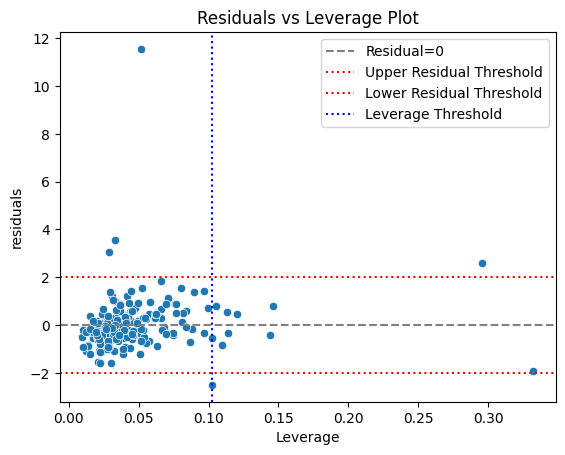

In [193]:
leverage_threshold = (2 * (p + 1)) / n
residual_upper_threshold = 2  
residual_lower_threshold = -2  
sns.scatterplot(x=leverage, y=student_resid)
plt.axhline(y=0, color='grey', linestyle='dashed', label='Residual=0')
plt.axhline(y=residual_upper_threshold, color='red', linestyle='dotted', label='Upper Residual Threshold')
plt.axhline(y=residual_lower_threshold, color='red', linestyle='dotted', label='Lower Residual Threshold')
plt.axvline(x=leverage_threshold, color='blue', linestyle='dotted', label='Leverage Threshold')
plt.xlabel('Leverage')
plt.ylabel('residuals')
plt.title('Residuals vs Leverage Plot')
plt.legend()
plt.savefig('rvsp.png')
plt.show()

In [194]:
influence_less_data = final_dataset.drop(elimination_outliers)
influence_less_data_model = ols("gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys", data = influence_less_data).fit()
print(influence_less_data_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gnip   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     167.1
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           4.32e-79
Time:                        19:00:09   Log-Likelihood:                -33.208
No. Observations:                 189   AIC:                             84.42
Df Residuals:                     180   BIC:                             113.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0347      0.022     -1.608      0.1

In [195]:
print(final_dataset_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gnip   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     86.73
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.22e-58
Time:                        19:00:09   Log-Likelihood:                -125.18
No. Observations:                 195   AIC:                             268.4
Df Residuals:                     186   BIC:                             297.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.939e-18      0.034  -2.06e-16      1.0

Given comparison of model after and before elimination of Influence points we have a better R-squared post elimination

### __*Multicollinearity*__ 

In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = influence_less_data.drop(['gnip'],axis=1).columns

In [197]:
vif_data["VIF"] = [np.sqrt(variance_inflation_factor(final_dataset.drop(['gnip'],axis=1).values, i))
                          for i in range(len(final_dataset.drop(['gnip'],axis=1).columns))]
vif_data

,feature,VIF
0,cdepc,1.320877
1,eys,2.433301
2,gdi,1.594046
3,hdi,6.522220
4,lfprf,1.398803
5,lfprm,1.244763
6,leb,3.000055
7,mys,3.033925


In [198]:
X = influence_less_data.drop(['gnip'],axis=1).to_numpy()  # This is the model's design matrix (explanatory variables)
eigenvals = np.linalg.eigvals(X.T @ X)
eigenvals

array([774.85382617, 275.42259432, 138.29844337,   3.21138372,
        79.62225392,  34.14740222,  48.0678577 ,  44.61304039])

In [199]:
Rig_model_final = ols("gnip ~ cdepc + eys + gdi + hdi+ lfprf + lfprm + leb + mys", data = influence_less_data).fit()
print(Rig_model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                   gnip   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     167.1
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           4.32e-79
Time:                        19:00:09   Log-Likelihood:                -33.208
No. Observations:                 189   AIC:                             84.42
Df Residuals:                     180   BIC:                             113.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0347      0.022     -1.608      0.1

In [200]:
table = sm.stats.anova_lm(Rig_model_final, typ=2)
print("Anova Testing for Relation among parameters")
print(table)

Anova Testing for Relation among parameters
             sum_sq     df           F        PR(>F)
cdepc      5.591652    1.0   64.004374  1.467449e-13
eys        2.700491    1.0   30.910948  9.624104e-08
gdi        6.700027    1.0   76.691297  1.439206e-15
hdi        8.867671    1.0  101.503054  3.251724e-19
lfprf      9.089192    1.0  104.038672  1.439823e-19
lfprm      4.047318    1.0   46.327285  1.437232e-10
leb        0.377723    1.0    4.323571  3.900536e-02
mys        2.397853    1.0   27.446824  4.480939e-07
Residual  15.725446  180.0         NaN           NaN


In [201]:
print(Rig_model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                   gnip   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     167.1
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           4.32e-79
Time:                        19:00:09   Log-Likelihood:                -33.208
No. Observations:                 189   AIC:                             84.42
Df Residuals:                     180   BIC:                             113.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0347      0.022     -1.608      0.1